In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([313])) that is different to the input size (torch.Size([313, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


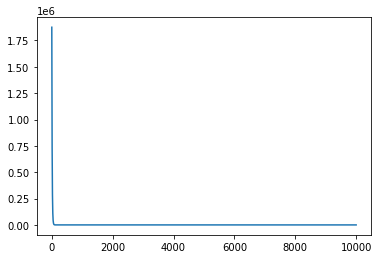

In [ ]:
import numpy as np
import torch
import math
import matplotlib.pyplot as plt

with open('/content/drive/Shareddrives/Compv5/auto-mpg.data') as file:
    data = []
    for line in file:
        # delete entries with '?' in them ... can't convert to float.
        entry = line.split()[:6]
        if '?' not in entry:
            data.append(entry)

# Convert data to numpy array.
np_data = np.array(data).astype('float')

# Train/test split
train   = np.array(np_data[:math.floor(len(data) * 0.8)])
x_train = torch.tensor(train[:, 1:]).float().cuda()
y_train = torch.tensor(train[:, 0]).float().cuda()
test    = np.array(np_data[math.floor(len(data) * 0.8):])
x_test  = torch.tensor(test[:, 1:]).float().cuda()
y_test  = torch.tensor(test[:, 0]).float().cuda()

# Classifier
class LinearClassifier(torch.nn.Module):
    def __init__(self, input_dim=5, output_dim=1):
        super(LinearClassifier, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
  
    def forward(self, x):
        return self.linear(x)

model     = LinearClassifier().cuda()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.000000002)
all_loss  = []

for epoch in range(10000):
    output = model(x_train)
    loss   = criterion(output, y_train.view(-1))
    all_loss.append(loss.item())
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

plt.plot(all_loss)

In [ ]:
predictions = []
for i in range(len(x_test)):
    predictions.append(model(x_test[i]))

print('Prediction   Ground Truth   Difference')
for i in range(len(predictions)):
    print(f'{predictions[i].item():10.2f}{y_test[i]:15.2f}{predictions[i].item() - y_test[i]:13.2f}')

predictions_t = torch.tensor(predictions).cuda()
mse = ((predictions_t - y_test)**2).sum().data / predictions_t.shape[0]

print(f'\nMean Squared Error: {mse}')

Prediction   Ground Truth   Difference
     45.27          24.30        20.97
     37.87          19.10        18.77
     32.49          34.30        -1.81
     38.05          29.80         8.25
     40.99          31.30         9.69
     30.78          37.00        -6.22
     33.26          32.20         1.06
     37.45          46.60        -9.15
     29.79          27.90         1.89
     37.94          40.80        -2.86
     41.76          44.30        -2.54
     51.88          43.40         8.48
     59.59          36.40        23.19
     64.63          30.00        34.63
     24.47          44.60       -20.13
     34.94          33.80         1.14
     26.82          29.80        -2.98
     20.32          32.70       -12.38
     41.58          23.70        17.88
     33.90          35.00        -1.10
     35.84          32.40         3.44
     31.20          27.20         4.00
     32.34          26.60         5.74
     27.23          25.80         1.43
     19.40          23.50

In [ ]:
!jupyter nbconvert --to html "/content/drive/Shareddrives/Compv5/Lab7Task1.ipynb"

[NbConvertApp] Converting notebook /content/drive/Shareddrives/Compv5/Lab7Task1.ipynb to html
[NbConvertApp] Writing 297681 bytes to /content/drive/Shareddrives/Compv5/Lab7Task1.html
